In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import seaborn as sns
from nltk.tokenize import word_tokenize
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import sys
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from collections import OrderedDict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import joblib
from google.colab import drive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report



print(sys.version)


Pandas version: 2.2.2
Numpy version: 1.26.4
3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [ ]:

!pip install joblib

**Loading Training Dataset given**

In [ ]:
#loading dataset
df=pd.read_csv("/content/drive/MyDrive/ecommerce_train_product_data.csv")
#checking first five rows of dataset
df.head()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [ ]:
print(df.dtypes)

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object


In [ ]:
df['description'] = df['description'].astype(str)
df['product_category_tree'] = df['product_category_tree'].astype(str)
print(df.dtypes)

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object


In [ ]:
# description, product_category_tree are essential columns to train model hence keeping only those columns
df = df[['description', 'product_category_tree']]
# checking the first 5 rows of df again
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            14999 non-null  object
 1   product_category_tree  14999 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [ ]:
# Using set option in pandas to show full content of a column.
pd.set_option('display.max_colwidth', None)
# checking the first 5 rows of df again
df.head()

,description,product_category_tree
0,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts",Clothing
1,"Key Features of AW Bellies Sandals Wedges Heel Casuals,AW Bellies Price: Rs. 499 Material: Synthetic Lifestyle: Casual Heel Type: Wedge Warranty Type: Manufacturer Product Warranty against manufacturing defects: 30 days Care instructions: Allow your pair of shoes to air and de-odorize at regular basis; use shoe bags to prevent any stains or mildew; dust any dry dirt from the surface using a clean cloth; do not use polish or shiner,Specifications of AW Bellies General Ideal For Women Occasion Casual Shoe Details Color Red Outer Material Patent Leather Heel Height 1 inch Number of Contents in Sales Package Pack of 1 In the Box One Pair Of Shoes",Footwear
2,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Black, Red,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 2 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTGHT_11 In the Box 2 shorts",Clothing
3,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, White, Red,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 4 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's In the Box 4 shorts Additional Details Style Code ALTGHT4P_26 Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach",Clothing
4,"Key Features of dilli bazaaar Bellies, Corporate Casuals, Casuals Material: Fabric Occasion: Ethnic, Casual, Party, Formal Color: Pink Heel Height: 0,Specifications of dilli bazaaar Bellies, Corporate Casuals, Casuals General Occasion Ethnic, Casual, Party, Formal Ideal For Women Shoe Details Weight 200 g (per single Shoe) - Weight of the product may vary depending on size. Heel Height 0 inch Outer Material Fabric Color Pink",Footwear


**Exploratory Data Analysis**

In [ ]:
#Checking shape of dataset
df.shape

(14999, 2)

**Preprocessing**

Handle Missing Data

In [ ]:
#Check for missing values
print(df.isnull().sum())
#few missing rows, drop them
df = df.dropna()
#checking shape after removing missing/null rows
df.shape

description              0
product_category_tree    0
dtype: int64


(14999, 2)

**Handle Outliers and Inconsistencies**

In [ ]:
#Check for duplicates
df = df.drop_duplicates()
#checking shape after removing duplicates
df.shape

(13167, 2)

In [ ]:
#Ensure product_category_tree values are consistent
print(df['product_category_tree'].unique())

['Clothing ' 'Footwear ' 'Pens & Stationery ' 'Bags, Wallets & Belts '
 'Home Decor & Festive Needs ' 'Automotive ' 'Tools & Hardware '
 'Baby Care ' 'Mobiles & Accessories ' 'Watches '
 'Toys & School Supplies ' 'Jewellery ' 'Kitchen & Dining ' 'Computers ']


In [ ]:
# Count the number of words in each description
df['word_count_decription'] = df['description'].apply(lambda x: len(str(x).split()))

#Group by target and calculate mean
mean_length_by_target = df.groupby('product_category_tree')['word_count_decription'].mean()

# Display the result
df.head()

,description,product_category_tree,word_count_decription
0,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts",Clothing,64
1,"Key Features of AW Bellies Sandals Wedges Heel Casuals,AW Bellies Price: Rs. 499 Material: Synthetic Lifestyle: Casual Heel Type: Wedge Warranty Type: Manufacturer Product Warranty against manufacturing defects: 30 days Care instructions: Allow your pair of shoes to air and de-odorize at regular basis; use shoe bags to prevent any stains or mildew; dust any dry dirt from the surface using a clean cloth; do not use polish or shiner,Specifications of AW Bellies General Ideal For Women Occasion Casual Shoe Details Color Red Outer Material Patent Leather Heel Height 1 inch Number of Contents in Sales Package Pack of 1 In the Box One Pair Of Shoes",Footwear,107
2,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Black, Red,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 2 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTGHT_11 In the Box 2 shorts",Clothing,63
3,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, White, Red,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 4 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's In the Box 4 shorts Additional Details Style Code ALTGHT4P_26 Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach",Clothing,65
4,"Key Features of dilli bazaaar Bellies, Corporate Casuals, Casuals Material: Fabric Occasion: Ethnic, Casual, Party, Formal Color: Pink Heel Height: 0,Specifications of dilli bazaaar Bellies, Corporate Casuals, Casuals General Occasion Ethnic, Casual, Party, Formal Ideal For Women Shoe Details Weight 200 g (per single Shoe) - Weight of the product may vary depending on size. Heel Height 0 inch Outer Material Fabric Color Pink",Footwear,64


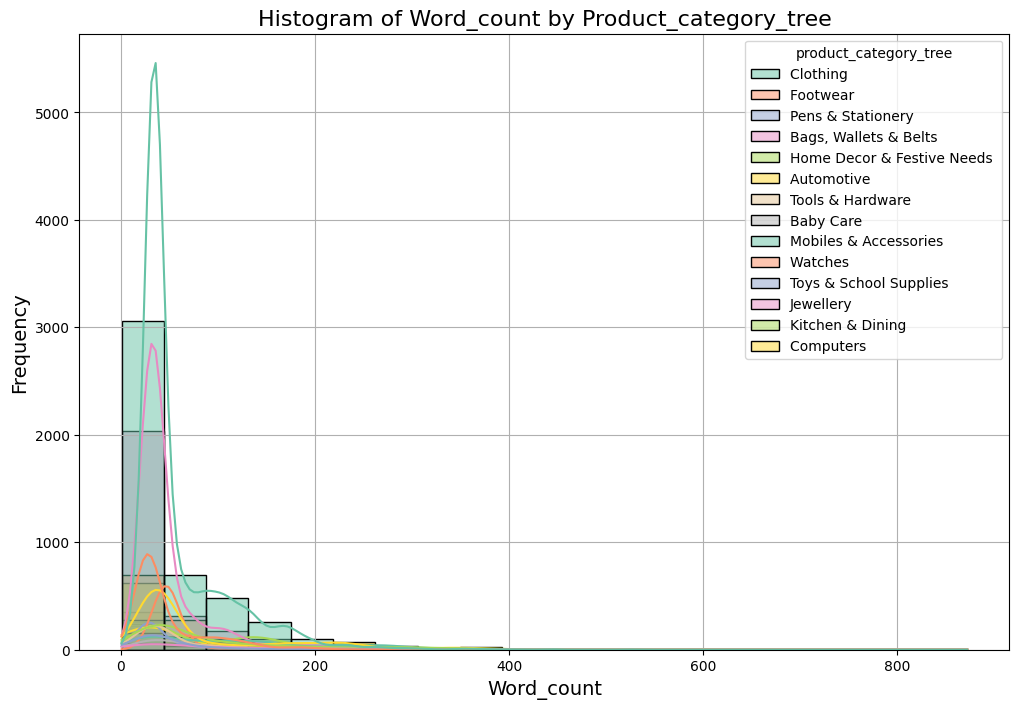

65.65914786967419 is the mean of word count in whole datset


In [ ]:
# Function to plot a histogram with word counts by product category
def his_plot(data, x_col, group_col, bins=20, kde=True, palette="Set2", figsize=(12, 8)):
    """
    Plots a histogram for the given data with grouping.

    Parameters:
        data (DataFrame): The dataset containing the columns.
        x_col (str): Column name for x-axis (e.g., 'word_count').
        group_col (str): Column name for grouping (e.g., 'product_category_tree').
        bins (int): Number of bins for the histogram (default is 20).
        kde (bool): Whether to overlay a kernel density estimate (default is True).
        palette (str): Color palette for the plot (default is "Set2").
        figsize (tuple): Size of the figure (default is (12, 8)).
    """
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=x_col, hue=group_col, bins=bins, kde=kde, palette=palette)
    plt.title(f'Histogram of {x_col.capitalize()} by {group_col.capitalize()}', fontsize=16)
    plt.xlabel(x_col.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()

df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))  # Ensure word count column exists
his_plot(data=df, x_col='word_count', group_col='product_category_tree')
print(df['word_count'].mean(), "is the mean of word count in whole datset")

let's do some cleaning steps and check word_count

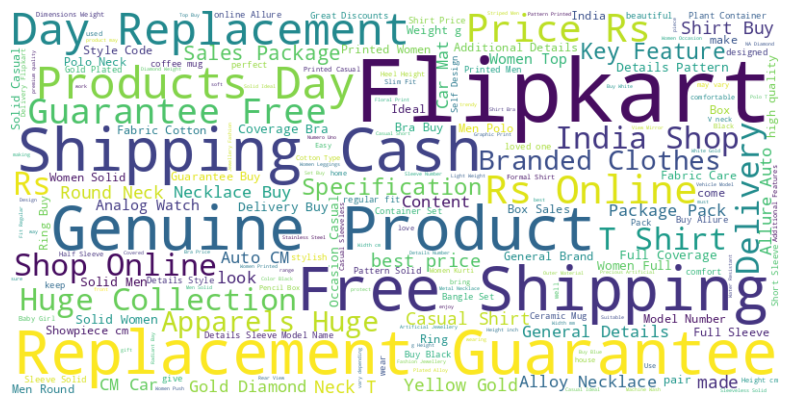

In [ ]:
text = " ".join(df['description'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Lemmitizing, Removing Stop words, Removing extra spaces**

In [ ]:
#Standardize target names
df['product_category_tree'] = df['product_category_tree'].str.strip().str.lower()

In [ ]:
# Replace numbers like price values with 'numbr'
df['description'] = df['description'].str.replace(r'\d+(\.\d+)?', 'numbr')

The stop words are imported from the NLTK library and are removed from the description. There are two kinds of stop words.


*   General stop words like an and in appear everywhere irrespective of the domain. It doesn't matter where the text is coming from.
*   There are few domain-specific stop words. For example, buy, com, and cash can appear only in certain domains, such as e-commerce and retail. We need to remove them as well.





In [ ]:

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define general stop words and domain-specific stop words
stop_words = set(stopwords.words('english'))
specific_stop_words = {"numbr", "rs", "flipkart", "buy", "com", "free", "day",
                       "cash", "replacement", "guarantee", "genuine", "key",
                       "feature", "delivery", "products", "product", "shipping",
                       "online", "india", "shop"}

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Replace numeric values with "numbr"
    text = re.sub(r'\d+(\.\d+)?', 'numbr', text)
    # Remove non-word characters and extra whitespace
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"www.\S+", "", text)


    # Split into words
    words = text.split()

    # Remove general and domain-specific stop words, and apply lemmatization
    words = [lemmatizer.lemmatize(word)
             for word in words if word not in stop_words and word not in specific_stop_words]
    # words = text.split()  # Split the text into words
    unique_words = list(OrderedDict.fromkeys(words))  # Use OrderedDict to maintain order
    # Join words back into a single string
    return ' '.join(unique_words)


    # return " ".join(words)

# Apply the updated preprocessing function
df['cleaned_description'] = df['description'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



There are a lot of domain-related words occurring in the corpus, which add no value to the task. For example, the word rs is an Indian currency present in most documents but not useful. Let's remove these domain-related stop words and plot again.

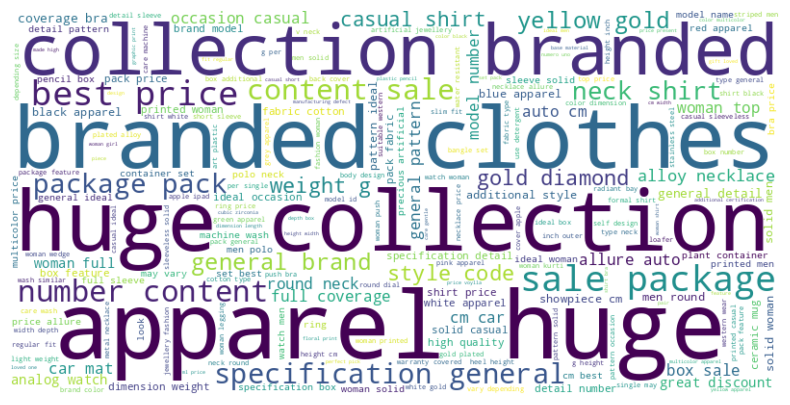

In [ ]:
text = " ".join(df['cleaned_description'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

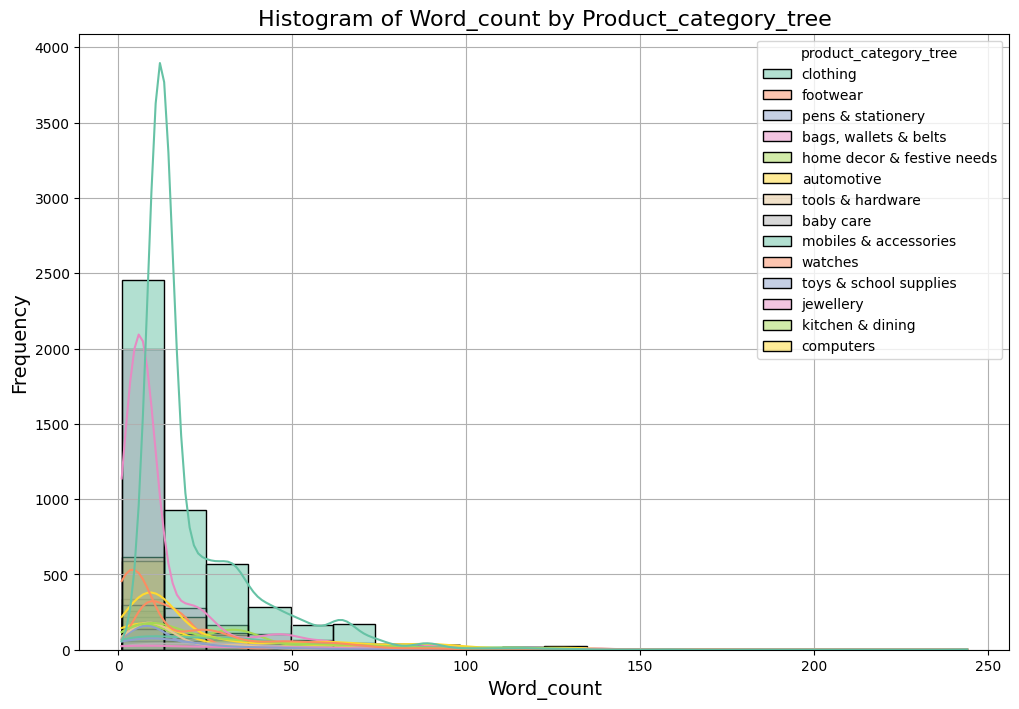

22.029999240525555 is the mean of word count in whole datset


In [ ]:
df['word_count'] = df['cleaned_description'].apply(lambda x: len(str(x).split()))  # Ensure word count column exists
his_plot(data=df, x_col='word_count', group_col='product_category_tree')
print(df['word_count'].mean(), "is the mean of word count in whole datset")

After preprocessing mean word count in description decreased in our dataset from 65 to 50

**Handling Imbalance Data**

In [ ]:
# Checking the class distribution of the target variable
df['product_category_tree'].value_counts()

,count
product_category_tree,
clothing,4664
jewellery,2658
footwear,988
automotive,935
home decor & festive needs,606
kitchen & dining,606
computers,529
watches,526
mobiles & accessories,501


Imablance ratio is high, After doing feature engineering lets over sample data to handle imbalances data USING SMOTE method

Imbalance Ratio: 30.68


<ipython-input-21-690ff1502af5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


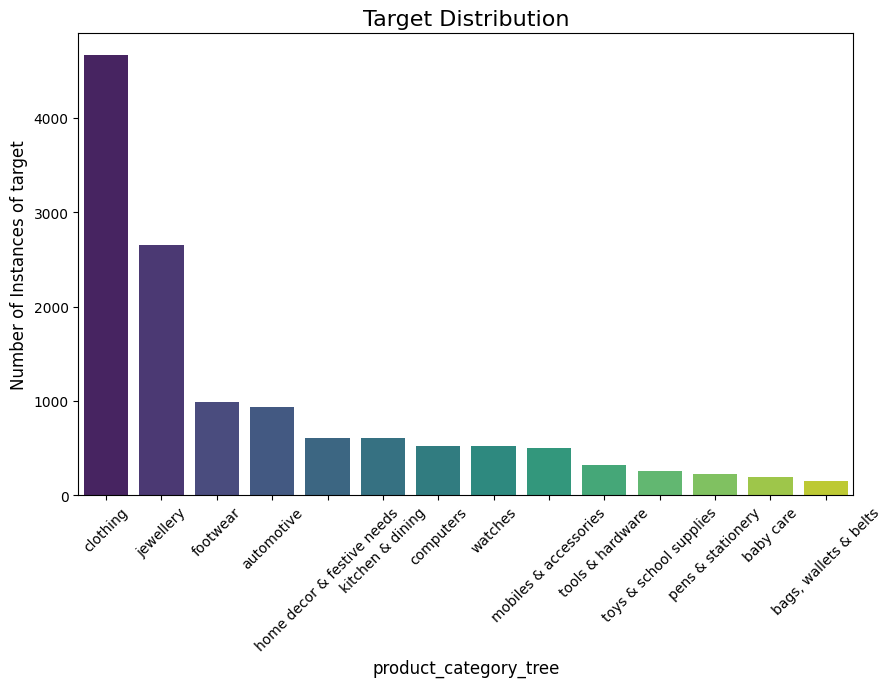

In [ ]:
# Class distribution
class_counts = df['product_category_tree'].value_counts()

# Imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Target Distribution", fontsize=16)
plt.xlabel("product_category_tree", fontsize=12)
plt.ylabel("Number of Instances of target", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Feature Engineering**
To build the text classification model, we need to first convert the text data into features.

We use deep learning algorithms to build the classifier, and feature extraction should be carried out accordingly. We use the Keras tokenizer function to generate features. We are setting max_length to 200, which means we are only considering 200 features for the classifier. This number also decides the accuracy, and the ideal number can be obtained from hyperparameter tuning.

In [ ]:
# Features and target
X = df['cleaned_description']
y = df['product_category_tree']


from sklearn.preprocessing import LabelEncoder

# Example of label encoding a column
le = LabelEncoder()
df['product_category_tree'] = le.fit_transform(df['product_category_tree'])


The choice between label encoding and one-hot encoding
Tree-Based Models: Algorithms like Random Forest, Gradient Boosted Trees, or XGBoost can handle numerical labels without assuming an ordinal relationship. For these models, label encoding works well and avoids creating unnecessary dummy variables.

In [ ]:

# Create Word2Vec embeddings
# word2vec_model = Word2Vec(sentences=df['cleaned_description'], vector_size=200, window=5, min_count=1, workers=4)

# # Save the Word2Vec embeddings for future use (optional)
# word2vec_model.save("word2vec_model.model")


Train a Word2Vec model on the cleaned text data.
Since Word2Vec generates embeddings for individual words, we need to aggregate them to represent a sentence (e.g., product description). Common approaches include:

Averaging word vectors, using word2vec model gave less acucracy in unseen data hence used glove emebeddings to better train on unseen data

In [ ]:
# def sentence_to_vector(sentence, model):
#     # Get the Word2Vec embedding for each word and average them
#     word_vectors = [model.wv[word] for word in sentence if word in model.wv]
#     if len(word_vectors) > 0:
#         return np.mean(word_vectors, axis=0)
#     else:
#         return np.zeros(model.vector_size)  # Handle sentences with no valid words

# # Generate sentence vectors for all product descriptions
# X = np.array([sentence_to_vector(sentence, word2vec_model) for sentence in df['cleaned_description']])

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("incorpes/glove6b200d")

print("Path to dataset files:", path)

import numpy as np
import kagglehub
import re
from nltk.tokenize import word_tokenize

# Path to the downloaded GloVe file from kagglehub
glove_file_path = '/root/.cache/kagglehub/datasets/incorpes/glove6b200d/versions/1/glove.6B.200d.txt'

# Function to load GloVe embeddings from the file
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = coefs
    return embeddings_index

# Load the GloVe embeddings
glove_embeddings = load_glove_embeddings(glove_file_path)

 #Function to convert sentences to vectors using GloVe embeddings
def sentence_to_glove_vector(sentence, embeddings_index, embedding_dim=200):
    # Get the embeddings for each word and average them
    word_vectors = [embeddings_index[word] for word in sentence if word in embeddings_index]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)  # Handle sentences with no valid words

# Apply preprocessing and convert descriptions to vectors
df['cleaned_description'] = df['cleaned_description'].apply(preprocess_text)
X = np.array([sentence_to_glove_vector(sentence, glove_embeddings) for sentence in df['cleaned_description']])



In [ ]:
 #Function to convert sentences to vectors using GloVe embeddings
def sentence_to_glove_vector(sentence, embeddings_index, embedding_dim=200):
    # Get the embeddings for each word and average them
    word_vectors = [embeddings_index[word] for word in sentence if word in embeddings_index]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)  # Handle sentences with no valid words

# Apply preprocessing and convert descriptions to vectors
df['cleaned_description'] = df['cleaned_description'].apply(preprocess_text)
X = np.array([sentence_to_glove_vector(sentence, glove_embeddings) for sentence in df['cleaned_description']])

In [ ]:
#train test split
# split the data into training and test set with balanced split based on target class
#The stratify=y ensures the class distribution is preserved in both splits.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,test_size=0.2,
                                                    stratify=y)
print(X_train.shape, "shape of X-training data")
print(y_train.shape, "shape of y-training data")
print(X_test.shape, "shape of X-testing data")
print(y_test.shape, "shape of y-tesing data")

(10533, 200) shape of X-training data
(10533,) shape of y-training data
(2634, 200) shape of X-testing data
(2634,) shape of y-tesing data


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Check how is distribution of sample in training data after SMOTE is appllied

**oversampling using SMOTE**

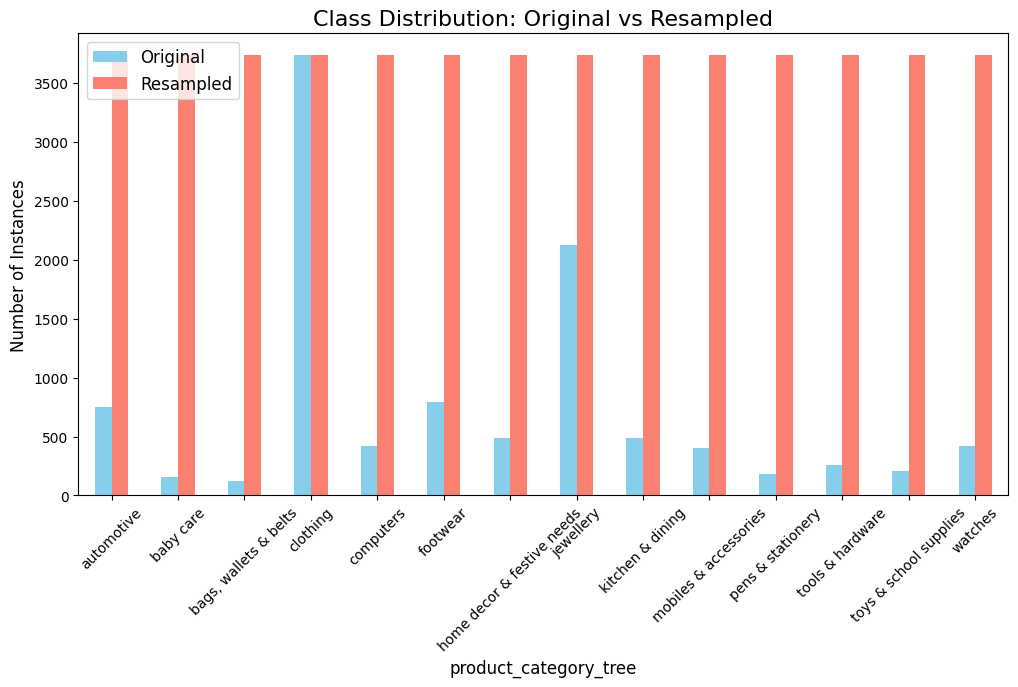

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count class distribution in original and resampled data
original_counts = pd.Series(y_train).value_counts().sort_index()
resampled_counts = pd.Series(y_train_resampled).value_counts().sort_index()

# Create a DataFrame for comparison
df_comparison = pd.DataFrame({
    'Original': original_counts,
    'Resampled': resampled_counts
}).fillna(0)  # Fill missing class counts with 0 if any class is missing in one of the sets

# Plot the comparison
df_comparison.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title("Class Distribution: Original vs Resampled", fontsize=16)
plt.xlabel("product_category_tree", fontsize=12)
plt.ylabel("Number of Instances", fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.show()


Now data is ready after preprocessing such that we can feed into our models

Create a matrix to store details of outputs from each model so we can pick best model out of it

In [ ]:
# create an empty dataframe to store the scores for various algorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','f1 Score'])

# append the result table for all performance scores
def update_matrix(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = pd.concat([score_card,pd.DataFrame([{'model_name':model_name,
                                    'Accuracy Score' : accuracy_score(y_test, y_pred),
                                    'Precision Score': precision_score(y_test, y_pred, average="weighted"),
                                    'Recall Score': recall_score(y_test, y_pred, average="weighted"),
                                    'f1 Score': f1_score(y_test, y_pred, average="weighted")}])],
                                    ignore_index = True)

***Model:1 -> Random Forest Classifier***

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_classifier.predict(X_test)

Accruracy is 85% and F1 score also not bad

Classification Report:
                             precision    recall  f1-score   support

                automotive       0.96      0.85      0.90       187
                 baby care       0.44      0.38      0.41        39
     bags, wallets & belts       0.77      0.57      0.65        30
                  clothing       0.88      0.91      0.90       933
                 computers       0.73      0.75      0.74       106
                  footwear       0.78      0.76      0.77       198
home decor & festive needs       0.64      0.78      0.70       121
                 jewellery       0.89      0.92      0.90       532
          kitchen & dining       0.91      0.83      0.87       121
     mobiles & accessories       0.84      0.70      0.77       100
         pens & stationery       0.57      0.44      0.50        45
          tools & hardware       0.86      0.75      0.80        64
    toys & school supplies       0.51      0.62      0.56        53
                   watc

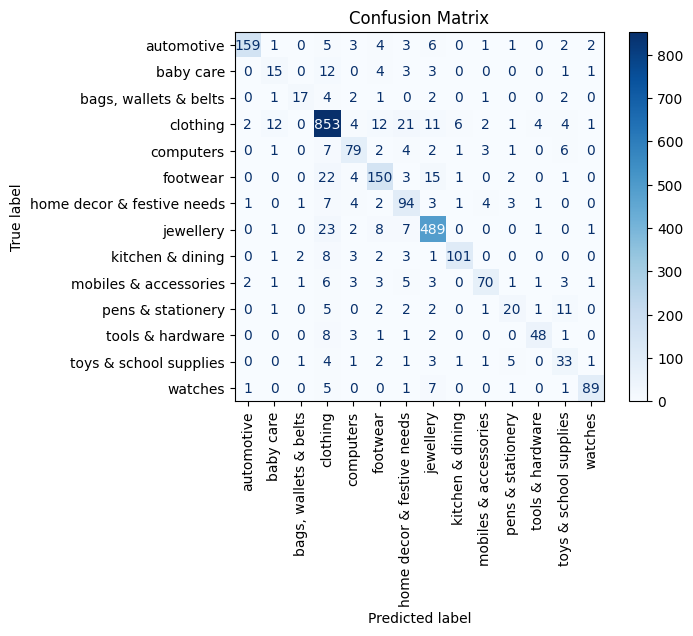

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the performance of a trained model on the test data.

    Parameters:
    - model: The trained machine learning model.
    - X_test: Features of the test dataset.
    - y_test: True labels of the test dataset.

    Outputs:
    - Prints classification report and accuracy score.
    - Displays confusion matrix.
    """
    # Convert y_test to a Series if it's a DataFrame
    if isinstance(y_test, pd.DataFrame):
        y_test = y_test.iloc[:, 0]  # Extract first column

    # Convert y_test to lowercase
    y_test = y_test.str.lower()

    # Make predictions
    y_pred = model.predict(X_test)

    # Convert predictions to lowercase
    y_pred = pd.Series(y_pred).str.lower()

    # Convert model's classes to lowercase
    full_labels = [label.lower() for label in model.classes_]

    # Evaluate the model
    print("Classification Report:\n", classification_report(y_test, y_pred, labels=full_labels, zero_division=0))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Generate and display confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=full_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=full_labels)

    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.xticks(rotation=90)
    plt.title("Confusion Matrix")
    plt.show()

# Call the function
evaluate_model(rf_classifier, X_test, y_test)



Before performing predicitons on test data, use cross validation to check how model performs in unseen data

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-Validation Scores: [0.98277017 0.98123863 0.9846846  0.98372739 0.98736358]
Mean CV Accuracy: 0.9839568749609293


Testing on unseen data given (test_data.csv)

In [ ]:
unseen_test_data=pd.read_csv("/content/drive/MyDrive/ecommerce_test_data.csv")

#check if there are any blank values
unseen_test_data.info()
# clean product description with the same preprocessing steps used for cleaning
# training 'product_descirpition'
unseen_test_data['cleaned_description'] = unseen_test_data['description'].apply(preprocess_text)
unseen_test_data=unseen_test_data['cleaned_description']
unseen_test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  2534 non-null   object 
 1   crawl_timestamp          2534 non-null   object 
 2   product_url              2534 non-null   object 
 3   product_name             2534 non-null   object 
 4   pid                      2534 non-null   object 
 5   retail_price             2530 non-null   float64
 6   discounted_price         2530 non-null   float64
 7   image                    2534 non-null   object 
 8   is_FK_Advantage_product  2534 non-null   bool   
 9   description              2534 non-null   object 
 10  product_rating           2534 non-null   object 
 11  overall_rating           2534 non-null   object 
 12  brand                    2012 non-null   object 
 13  product_specifications   2529 non-null   object 
dtypes: bool(1), float64(2), 

,cleaned_description
0,v art brass bracelet
1,kalpaveda copper cuff price attract emit divine consciousness wearing bracelet known antioxidant property help reduce joint pain gain freedom movement throughout body verified pure intertek soft metal therefore use brass insert ensure retain shape last long ayurveda recommends jewellery benefit multiple mentioned health recommended doctor rub lemon covered salt gently wash wipe cloth sparkling result
2,thelostpuppy book cover apple ipad air multicolor price designed protect impress lost puppy brings robust mobile size special anti slip technology protects phone way one matte finish superior quality add elegance class sturdiness
3,riana copper bangle
4,inox jewelry stainless steel cuff price popular american brand specializes alternative metal fashion ideal choice tropical climate oxidize tarnish compared silver brass time non toxic contain cancer causing agent lead made high quality numbrl safe skin health follows safety standard available also gone ion plating ip process known physical vapor deposition newest advanced surface finishing technique used today treat treatment allows varying shade tint gold black brown copper tone thin layer condensation usually titanium nitrate added base form settle leaf harder brighter undergone tested eight stronger tend durable wear tear method electro coating recommended avoid exposing perfume aerosol spray harsh detergent ultrasonic cleaner please clean mild soapy water soft brush item imported come one year limited manufacturer


In [ ]:
# test_words = set(word for sentence in unseen_test_data for word in sentence.split())
# unseen_vocab_coverage = len(test_words.intersection(word2vec_model.wv.index_to_key)) / len(test_words)
# print(f"Vocabulary Coverage: {unseen_vocab_coverage * 100:.2f}%")

NameError: name 'word2vec_model' is not defined

In [ ]:
# Assuming 'unseen_test_data' is a list of sentences (strings)
test_words = set(word for sentence in unseen_test_data for word in sentence.split())

# Calculate vocabulary coverage based on GloVe embeddings
unseen_vocab_coverage = len(test_words.intersection(glove_embeddings.keys())) / len(test_words)

Preprocessing of unseen data is done, we should not use SMOTE on unseen data it caused data leakage

In [ ]:
print(rf_classifier.feature_importances_)

[0.00437228 0.00578378 0.00376986 0.00407478 0.0044393  0.00442424
 0.00396035 0.00432604 0.00496496 0.00601326 0.00360167 0.00421695
 0.00574847 0.00671432 0.00453794 0.00852474 0.00482012 0.00599039
 0.00287158 0.00380045 0.00345425 0.00313701 0.0047261  0.00317343
 0.004856   0.0039729  0.0063758  0.00371776 0.00544937 0.00327383
 0.00475002 0.00440919 0.00571509 0.00518248 0.00420315 0.00533771
 0.00386709 0.00367624 0.00662509 0.00351091 0.0043099  0.00612896
 0.00437338 0.0036923  0.00505176 0.00380742 0.00497915 0.00373555
 0.00737452 0.00534262 0.00602831 0.00796635 0.0052341  0.00678798
 0.0050496  0.00621301 0.00592971 0.00421837 0.00452176 0.00716061
 0.00430767 0.00483566 0.00472866 0.00469061 0.00485214 0.0043693
 0.00580996 0.01064367 0.00319182 0.00443004 0.0049703  0.00467521
 0.00527136 0.0038321  0.00626579 0.00520275 0.00472904 0.00326127
 0.00317126 0.00344588 0.00426149 0.00541932 0.00425059 0.00406494
 0.0054558  0.00461421 0.00353549 0.00512336 0.00492247 0.00406

In [ ]:
#using same word2vec model from our tarining data to convert description of testing data to vectors
# unseen_test_data = np.array([sentence_to_vector(sentence, word2vec_model) for sentence in unseen_test_data])
# print(unseen_test_data[0])
# Assuming glove_embeddings is a dictionary loaded from the GloVe file
embedding_dim = 200  # Change this if you use a different GloVe dimension
unseen_test_data = np.array([sentence_to_glove_vector(sentence, glove_embeddings, embedding_dim) for sentence in unseen_test_data])

# Example: Print the first sentence vector
# print(unseen_test_data_vectors[0])



In [ ]:
y_pred = rf_classifier.predict(unseen_test_data_vectors)
test_results_given=pd.read_csv("/content/drive/MyDrive/Upgrad Knowledge/test_results.csv")
test_results_given.head()
print(test_results_given.shape)
print(pd.DataFrame(y_pred).shape)
#Convert the column vector to a 1D array using .ravel()  before passing into label encoder
# test_results_given=le.fit_transform(test_results_given)## Correctly format the test_results_given for LabelEncoder

(2534, 1)
(2534, 1)


In [ ]:
print(test_results_given)

       product_category_tree
0                 Jewellery 
1                 Jewellery 
2     Mobiles & Accessories 
3                 Jewellery 
4                 Jewellery 
...                      ...
2529              Baby Care 
2530              Baby Care 
2531              Baby Care 
2532              Baby Care 
2533              Baby Care 

[2534 rows x 1 columns]


In [ ]:
y_pred=pd.DataFrame(y_pred)
print(np.unique(np.array(y_pred)))

['automotive' 'baby care' 'bags, wallets & belts' 'clothing' 'computers'
 'footwear' 'home decor & festive needs' 'jewellery' 'kitchen & dining'
 'mobiles & accessories' 'pens & stationery' 'tools & hardware'
 'toys & school supplies' 'watches']


In [ ]:
print(y_pred.shape,test_results_given.shape)
test_results_given=pd.DataFrame(test_results_given)
print(y_pred.shape,test_results_given.shape)

(2534, 1) (2534, 1)
(2534, 1) (2534, 1)


In [ ]:
# print(unseen_test_data.dtype)
test_results_given=pd.DataFrame(test_results_given)

# print(unseen_test_data)
# Assuming the target labels are in the first column
test_results_given = test_results_given.iloc[:, 0].str.lower()
# print(test_results_given)
# print(y_pred)
test_results_given= test_results_given.str.strip()

difference_1 = np.setdiff1d(np.unique(np.array(test_results_given)), np.unique(np.array(y_pred)))
# print(difference_1)

[]


Classification Report:
                             precision    recall  f1-score   support

                automotive       0.53      0.25      0.34        75
                 baby care       0.22      0.05      0.08       259
     bags, wallets & belts       0.54      0.26      0.35       107
                  clothing       0.76      0.85      0.80       882
                 computers       0.27      0.17      0.21        47
                  footwear       0.65      0.90      0.76       144
home decor & festive needs       0.41      0.54      0.47       215
                 jewellery       0.64      0.61      0.62       313
          kitchen & dining       0.10      0.27      0.15        37
     mobiles & accessories       0.83      0.91      0.87       331
         pens & stationery       0.13      0.16      0.15        49
          tools & hardware       0.00      0.00      0.00        12
    toys & school supplies       0.47      0.51      0.49        59
                   watc

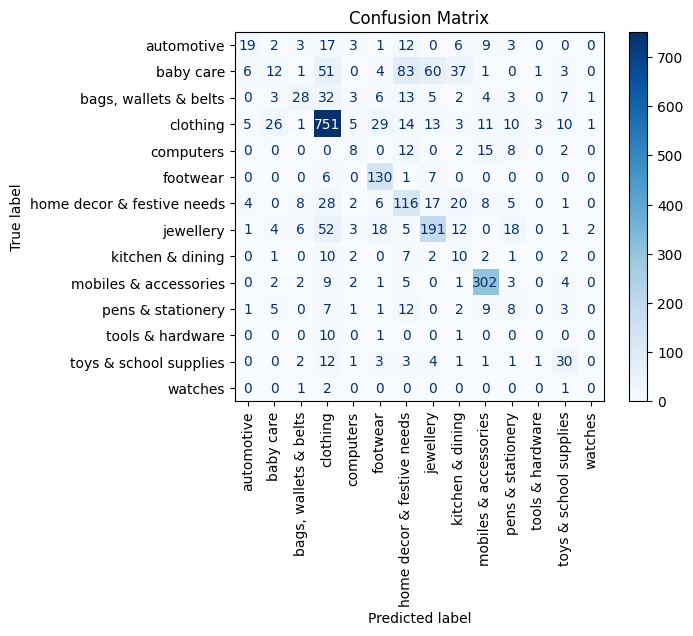

In [ ]:
evaluate_model(model=rf_classifier, X_test=unseen_test_data, y_test=test_results_given)

In [ ]:
update_matrix(test_results_given,y_pred,'Random Forest Classifier')
pd.set_option('display.max_colwidth', None)
print(score_card)

                 model_name  Accuracy Score  Precision Score  Recall Score  \
0  Random Forest Classifier        0.633386         0.605036      0.633386   

   f1 Score  
0   0.60619  


<ipython-input-32-6ec613829f69>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_card = pd.concat([score_card,pd.DataFrame([{'model_name':model_name,


Perfect Predictions:

The model predicted the correct category for all the 60% of samples in our test/unseen dataset.
Both the precision and recall are ~60%, model can be imporved


In [ ]:
#checking how featured are dependent to give us output
feature_importances = rf_classifier.feature_importances_
print(feature_importances)

**Model 2 -> Logistic Regression Model**

In [ ]:
# Initializing the Logistic Regression Model
lr = LogisticRegression(class_weight='balanced')
# Fitting the model on the training data
lr.fit(X_train_resampled, y_train_resampled)
# Obtaining preditctions on the test data
y_pred_lr = lr.predict(X_test) #X is already converted to word2vec and cleaned and preprocessed

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
## warining that lbfgs cannot converge on given iteration hence scaling data to better converge model

In [ ]:
# Step 2: Initialize the scaler
scaler = StandardScaler()

# Step 3: Fit the scaler only on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and train the model
lr = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)
lr.fit(X_train_scaled, y_train_resampled)

# Step 5: Evaluate the model on the test data
y_pred_test = lr.predict(X_test_scaled)

# Calculate accuracy or other metrics for validation
print("Validation Accuracy:", accuracy_score(y_test, y_pred_test))

# Step 6: Transform unseen test data using the same scaler
unseen_test_data_scaled = scaler.transform(unseen_test_data)

# Step 7: Predict on the unseen test data
y_pred_unseen_lr = lr.predict(unseen_test_data_scaled)

# Print final predictions or evaluate if ground truth labels are available
print("Predictions on unseen data:", y_pred_unseen_lr)


Validation Accuracy: 0.5827638572513287
Predictions on unseen data: ['automotive' 'automotive' 'pens & stationery' ... 'kitchen & dining'
 'kitchen & dining' 'kitchen & dining']


In [ ]:
y_pred_unseen_lr = lr.predict(unseen_test_data_scaled)

**Hyper parameter tuning to find best logistic regression parameters**

In [ ]:
# defining the hyperparameter grid dictionary
param_gridlr = {
    'C': [0.01, 0.1],
    # C': [0.01, 0.1, 1, 10, 100
    'solver': ['liblinear', 'lbfgs'] #solver for lositic regression
}

# Set up the grid search
grid_searchlr = GridSearchCV(lr, param_gridlr, cv=5, scoring='accuracy')
# This creates a GridSearchCV object that will:
# Perform cross-validation with cv=5 (5-fold cross-validation) to evaluate the model’s performance.
# Optimize accuracy using scoring='accuracy'.
# Search over the parameter grid param_gridlr to find the best combination of C and solver for the Logistic Regression model(lr).

# Fitting the grid on the training data
grid_searchlr.fit(X_train_scaled, y_train_resampled)

# Display the best parameters and best score
print("Best Parameters:", grid_searchlr.best_params_)
print("Best Cross-Validation Accuracy:", grid_searchlr.best_score_)

# Obtaining the Best model
best_lr = grid_searchlr.best_estimator_

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.6390093547875777


Accuracy on unseen Upgrad data: 0.39108129439621153
Classification Report:
                             precision    recall  f1-score   support

                automotive       0.13      0.12      0.12        75
                 baby care       0.15      0.17      0.16       259
     bags, wallets & belts       0.27      0.38      0.32       107
                  clothing       0.90      0.38      0.54       882
                 computers       0.06      0.09      0.07        47
                  footwear       0.34      0.58      0.43       144
home decor & festive needs       0.52      0.30      0.38       215
                 jewellery       0.50      0.45      0.47       313
          kitchen & dining       0.07      0.41      0.12        37
     mobiles & accessories       0.55      0.65      0.60       331
         pens & stationery       0.13      0.37      0.20        49
          tools & hardware       0.00      0.00      0.00        12
    toys & school supplies       0.19  

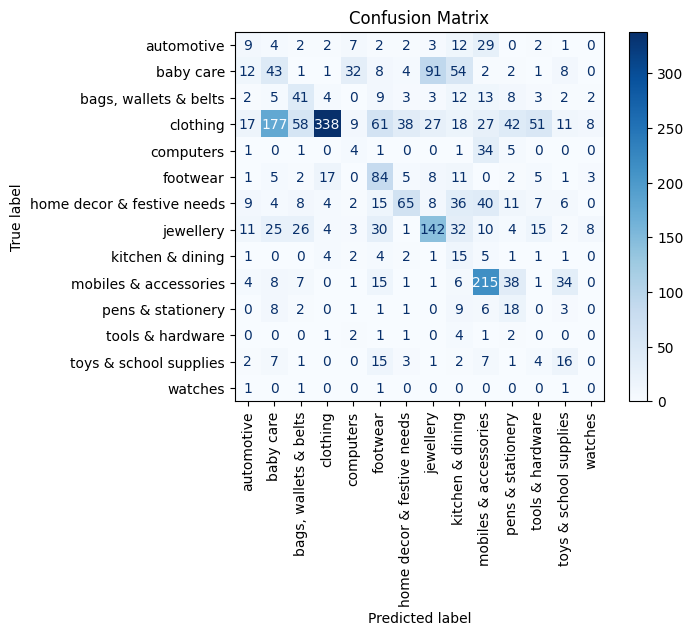

                                          model_name  Accuracy Score  \
0                           Random Forest Classifier        0.633386   
1  Logistic Regression_Before Hyper parameter tuning        0.391081   
2   Logistic Regression_After Hyper Parameter Tuning        0.390687   

   Precision Score  Recall Score  f1 Score  
0         0.605036      0.633386  0.606190  
1         0.551180      0.391081  0.426166  
2         0.550413      0.390687  0.425948  


In [ ]:
print("Accuracy on unseen Upgrad data:",accuracy_score(test_results_given, y_pred_unseen_lr))
update_matrix(test_results_given,y_pred_unseen_lr,'Logistic Regression_Before Hyper parameter tuning')
evaluate_model(best_lr, unseen_test_data_scaled, test_results_given)
y_pred_unseen_lr_hyperparameter=best_lr.predict(unseen_test_data_scaled)
update_matrix(test_results_given,y_pred_unseen_lr_hyperparameter,'Logistic Regression_After Hyper Parameter Tuning')
print(score_card)

In [ ]:
#saving models


import os
os.makedirs('/content/drive/MyDrive/models', exist_ok=True)
drive.mount('/content/drive')
joblib.dump(best_lr, '/content/best_logistic_regression.pkl')
joblib.dump(rf_classifier, '/content/Random_Forest_Classifier_model.pkl')
joblib.dump(lr, '/content/logistic_regression.pkl')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/logistic_regression.pkl']

In [ ]:
print(len(np.unique(np.array(y_train_resampled))))

14


**LSTM**

In [ ]:

# Assuming y_train_resampled and y_test are labels
# Ensure y_train_resampled and y_test are one-hot encoded
num_classes = len(np.unique(np.array(y_train_resampled)))
y_train_resampled=le.transform(y_train_resampled)
y_test=le.transform(y_test)

y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)
y_test = to_categorical(y_test, num_classes=num_classes)

# # Ensure data is 3D for LSTM (samples, timesteps, features)
# # Here, timesteps = 1 (since Glove embeddings are already vectorized)
# X_train_resampled = np.expand_dims(X_train_resampled, axis=1)  # Add timestep dimension
# X_test = np.expand_dims(X_test, axis=1)

# # Define the LSTM model
# model = Sequential([
#     # LSTM layer with 128 units
#     LSTM(128, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2]), return_sequences=False),
#     Dropout(0.2),  # Dropout to prevent overfitting
#     # Fully connected layer
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     # Output layer for classification
#     Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Train the model
# history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2)

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# # Predict on test data
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_test_classes = np.argmax(y_test, axis=1)

# # Evaluate using classification report
# from sklearn.metrics import classification_report
# print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


ValueError: y should be a 1d array, got an array of shape (52234, 14) instead.

In [ ]:
# print(y_train_resampled[0])
# y_train_resampled = le.fit_transform(y_train_resampled)  # Convert to integers
# y_test = le.transform(y_test)
# print(y_train_resampled[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


ValueError: y should be a 1d array, got an array of shape (52234, 14) instead.

Model Architecture:
LSTM Layer:
128 units, processes input sequences (timesteps & features).
return_sequences=False ensures it outputs a single vector (not sequences).
Dropout Layers: Prevent overfitting by randomly disabling neurons during training.
Dense Layers: Fully connected layers for learning and classification.
First Dense: 64 neurons with ReLU activation.
Output Dense: num_classes neurons with softmax activation for multi-class classification.

In [ ]:

# Step 1: Ensure data is 3D for LSTM (samples, timesteps, features)
# Assuming X_train_resampled and X_test are preprocessed Glove embeddings (2D arrays)
X_train_resampled = np.expand_dims(X_train_resampled, axis=1)  # Add a timestep dimension
X_test = np.expand_dims(X_test, axis=1)

# Step 2: Define the LSTM model
num_classes = y_train_resampled.shape[1]  # Number of classes from the one-hot encoding
model = Sequential([
    LSTM(128, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2]), return_sequences=False),
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Step 3: Compile the model using categorical cross-entropy loss for one-hot encoded labels
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 6: Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Step 7: Evaluate using classification report
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.2615 - loss: 2.1538 - val_accuracy: 0.1096 - val_loss: 3.6338
Epoch 2/20
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5092 - loss: 1.5045 - val_accuracy: 0.2217 - val_loss: 3.0779
Epoch 3/20
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.5719 - loss: 1.3377 - val_accuracy: 0.3434 - val_loss: 2.3800
Epoch 4/20
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6108 - loss: 1.2234 - val_accuracy: 0.3720 - val_loss: 2.0581
Epoch 5/20
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6329 - loss: 1.1511 - val_accuracy: 0.3587 - val_loss: 2.3788
Epoch 6/20
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6490 - loss: 1.1057 - val_accuracy: 0.3865 - val_loss: 2.2673
Epoch 7/20
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6691 - loss: 1.0528 - val_accuracy: 0.4113 - val_loss: 2.0574
Epoch 8/20
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6886 - loss: 0.

Optimizer: Adam (Adaptive Moment Estimation) adjusts learning rates dynamically for efficient convergence.
Loss Function: categorical_crossentropy is used because the target labels are one-hot encoded.
Metrics: Accuracy is used to monitor performance during training.

In [ ]:
# Ensure unseen_test_data is reshaped to (samples, timesteps, features)
unseen_test_data = np.expand_dims(unseen_test_data, axis=1)  # Adding timestep dimension

# Check the shape to make sure it's 3D (samples, timesteps, features)
print(f"Shape of unseen_test_data: {unseen_test_data.shape}")

# Now make predictions
y_pred_lstm = model.predict(unseen_test_data)


Shape of unseen_test_data: (2534, 1, 200)
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# update_matrix(y_pred_lstm,test_results_given,'LSTM')
# # print(score_card)
# Convert probabilities to class labels (if y_pred_lstm is in probability form)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
# Convert one-hot encoded labels to class labels
# y_test_classes = np.argmax(test_results_given, axis=1)
test_result_given_le=le.fit_transform(test_results_given)
# Evaluate using classification report
print("Classification Report:\n", classification_report(test_result_given_le, y_pred_lstm_classes))
update_matrix(y_pred_lstm_classes,test_result_given_le,'LSTM')



Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.41      0.36        75
           1       0.16      0.18      0.17       259
           2       0.50      0.54      0.52       107
           3       0.91      0.53      0.67       882
           4       0.10      0.09      0.09        47
           5       0.49      0.87      0.63       144
           6       0.53      0.47      0.50       215
           7       0.44      0.54      0.49       313
           8       0.17      0.30      0.21        37
           9       0.77      0.71      0.74       331
          10       0.12      0.63      0.21        49
          11       0.00      0.00      0.00        12
          12       0.67      0.03      0.06        59
          13       0.00      0.00      0.00         4

    accuracy                           0.51      2534
   macro avg       0.37      0.38      0.33      2534
weighted avg       0.61      0.51      0.53      2534



In [ ]:
# pd.set_option('display.max_colwidth', None)
print(score_card)

                                          model_name  Accuracy Score  \
0                           Random Forest Classifier        0.633386   
1  Logistic Regression_Before Hyper parameter tuning        0.391081   
2   Logistic Regression_After Hyper Parameter Tuning        0.390687   
3                                               LSTM        0.505525   

   Precision Score  Recall Score  f1 Score  
0         0.605036      0.633386  0.606190  
1         0.551180      0.391081  0.426166  
2         0.550413      0.390687  0.425948  
3         0.529126      0.505525  0.482938  


In [ ]:
# Sort the score card by accuracy score in descending order
eval_matrix = score_card.sort_values(by='f1 Score', ascending=False).reset_index(drop=True)
# Store the top 5 models into final_score_card
eval_matrix = sorted_score_card.head()
eval_matrix

,model_name,Accuracy Score,Precision Score,Recall Score,f1 Score
0,Random Forest Classifier,0.633386,0.605036,0.633386,0.606190
1,LSTM,0.505525,0.529126,0.505525,0.482938
2,Logistic Regression_Before Hyper parameter tuning,0.391081,0.551180,0.391081,0.426166
3,Logistic Regression_After Hyper Parameter Tuning,0.390687,0.550413,0.390687,0.425948
